1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в еонкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

a) ряд является временным, так как мы фиксируем цену на недвижимость (в идеале- цену на какую то определенную квартиру(дом)) в опредленные промежутки времени и видим ее изменение(сохранение) день ото дня (ежемесячно и т.п.)

б) если мы будем фиксировать скорость самолета каждую минуту полета (час полета) то полученный ряд изменения скорости на всем протяжении полета будет временным рядом

в) если фиксировать число отказов каждый день, то полученные результаты можно считать временным рядом

г) если фиксировать число обращений каждый час день за днем, то полученный результат, показывающий число обращений в определенный час каждого дня будет являться временным рядом

д) если фиксировать координаты автобуса при движении например, каждую минуту, то полученная зависимость координат от времени будет временным рядом


2.Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

In [2]:
DUQ_H_data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])
DUQ_H_data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [3]:
DUQ_H_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


Видим, что интервал изменения индексов начинается от 2005-12-31 01:00:00 и идет до 2018-01-02 00:00:00.

нет нулевух значений, нет пропусков.

In [4]:
DUQ_H_data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


Text(0, 0.5, 'МВт')

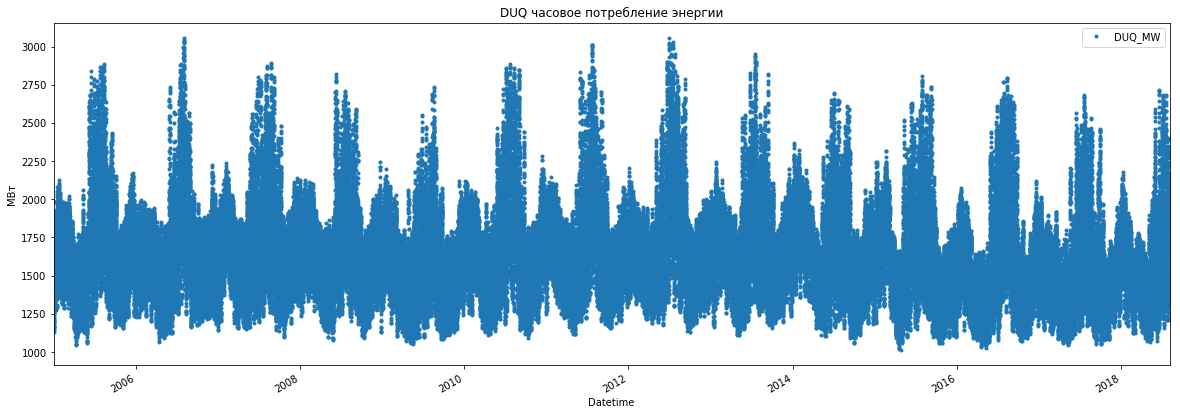

In [5]:
DUQ_H_data.plot( style = '.', figsize = ( 20, 7 ), title = 'DUQ часовое потребление энергии' )
plt.ylabel ( 'МВт' )

Визуальное исследование представленных данных показывает, что есть циклы потребления электроэнергии

In [6]:
DUQ_H_data['DUQ_MW']=DUQ_H_data.index
DUQ_H_data.index.nunique() == DUQ_H_data.shape[0]

False

Не все значения уникальны, есть повторяющиеся индексы (результат проверки равенства False)

In [7]:
ut = DUQ_H_data['DUQ_MW'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', DUQ_H_data.shape[0])

число уникальных значений:    119064  : число наблюдений :  119068


In [8]:
count_data = DUQ_H_data['DUQ_MW'].value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: DUQ_MW, dtype: int64

Как видно из представленной информации, повторяющиеся индексы случились в начале ноября месяца в 2014, 2015, 2016, 2017 годах. что дает нам право предположить о сезонном переводе часов с летнего на зимнее время.

Сделаем проверку данных в марте 2014, 2015, 2016, 2017 годов на наличие пропусков в часовых данных из-за перевода с зимнего на летнее время

In [30]:
day_H=DUQ_H_data['2014-03-01 00:00:00':'2014-03-31 23:00:00'].index.day

Day_count = day_H.value_counts()
print(Day_count.min())
d2014 = Day_count[Day_count != 24].index
d2014

23


Int64Index([9], dtype='int64')

Видим, что 09 марта 2014 г. занесено не 24 измерения, а только 23

In [26]:
DUQ_H_data['2014-03-09 01:00:00':'2014-03-09 06:00:00'].index

DatetimeIndex(['2014-03-09 01:00:00', '2014-03-09 02:00:00',
               '2014-03-09 04:00:00', '2014-03-09 05:00:00',
               '2014-03-09 06:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

Действительно, для этого дня после занесения значения в 2 часа, следующее значение занесено в 4 часа.
Проведем аналогичные исследования для данных 2015, 2016 и 2017 годов

In [31]:
day_H=DUQ_H_data['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

Day_count = day_H.value_counts()
print(Day_count.min())
d2015 = Day_count[Day_count != 24].index
d2015

23


Int64Index([8], dtype='int64')

In [32]:
DUQ_H_data['2015-03-08 01:00:00':'2015-03-08 06:00:00'].index

DatetimeIndex(['2015-03-08 01:00:00', '2015-03-08 02:00:00',
               '2015-03-08 04:00:00', '2015-03-08 05:00:00',
               '2015-03-08 06:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

In [33]:
day_H=DUQ_H_data['2016-03-01 00:00:00':'2016-03-31 23:00:00'].index.day

Day_count = day_H.value_counts()
print(Day_count.min())
d2016 = Day_count[Day_count != 24].index
d2016

23


Int64Index([13], dtype='int64')

In [34]:
DUQ_H_data['2016-03-13 01:00:00':'2016-03-13 06:00:00'].index

DatetimeIndex(['2016-03-13 01:00:00', '2016-03-13 02:00:00',
               '2016-03-13 04:00:00', '2016-03-13 05:00:00',
               '2016-03-13 06:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

In [35]:
day_H=DUQ_H_data['2017-03-01 00:00:00':'2017-03-31 23:00:00'].index.day

Day_count = day_H.value_counts()
print(Day_count.min())
d2017 = Day_count[Day_count != 24].index
d2017

23


Int64Index([12], dtype='int64')

In [36]:
DUQ_H_data['2017-03-12 01:00:00':'2017-03-12 06:00:00'].index

DatetimeIndex(['2017-03-12 01:00:00', '2017-03-12 02:00:00',
               '2017-03-12 04:00:00', '2017-03-12 05:00:00',
               '2017-03-12 06:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

3.Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [10]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [11]:
brent_data['data'] = brent_data.index

In [12]:
brent_data.head()

,Значение,data
Дата,,
2019-09-01,58.84,2019-09-01
2019-08-30,59.19,2019-08-30
2019-08-29,60.37,2019-08-29
2019-08-28,59.84,2019-08-28
2019-08-27,59.59,2019-08-27


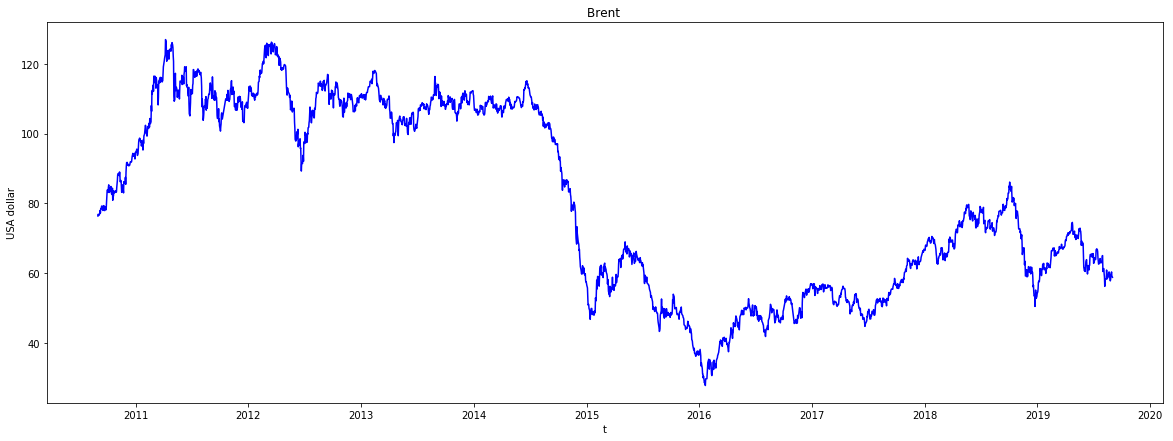

In [13]:
#brent_data  = brent_data.sort_index()
plt.figure( figsize=( 20, 7))
plt.plot(brent_data.index, brent_data['Значение'],'b' )
plt.ylabel('USA dollar')
plt.xlabel('t')
plt.title('Brent ')
plt.show()

Перегруппируем ряд для срднемесячных цен на нефть

In [14]:
brent_data_M = brent_data.resample("M").mean()
brent_data_M.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


Найдем среднеквадратичное отклонение для среднемесячных цен на нефть

In [15]:
brent_data_M_std = brent_data.resample("M").std()
brent_data_M_std.head()

,Значение
Дата,
2010-09-30,1.294269
2010-10-31,0.898559
2010-11-30,1.753625
2010-12-31,1.443311
2011-01-31,1.842147


Перегруппируем ряд для средненедельных цен на нефть

In [16]:
brent_data_W = brent_data.resample("W").mean()
brent_data_W.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


Найдем среднеквадратичное отклонение для средненедельных цен на нефть

In [17]:
brent_data_W_std = brent_data.resample("W").std()
brent_data_W_std.head()

,Значение
Дата,
2010-09-05,0.185688
2010-09-12,0.649759
2010-09-19,0.539728
2010-09-26,0.596068
2010-10-03,2.408588


Перегруппируем ряд для среднегодовых цен на нефть

In [18]:
brent_data_Y = brent_data.resample("Y").mean()
brent_data_Y.head()

,Значение
Дата,
2010-12-31,84.963238
2011-12-31,110.758746
2012-12-31,111.377484
2013-12-31,108.137114
2014-12-31,99.435493


Найдем среднеквадратичное отклонение для среднегодовых цен на нефть

In [19]:
brent_data_Y_std = brent_data.resample("Y").std()
brent_data_Y_std.head()

,Значение
Дата,
2010-12-31,5.269065
2011-12-31,7.021114
2012-12-31,7.777702
2013-12-31,4.014836
2014-12-31,14.512923


4.Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

Text(0.5, 0, 'year')

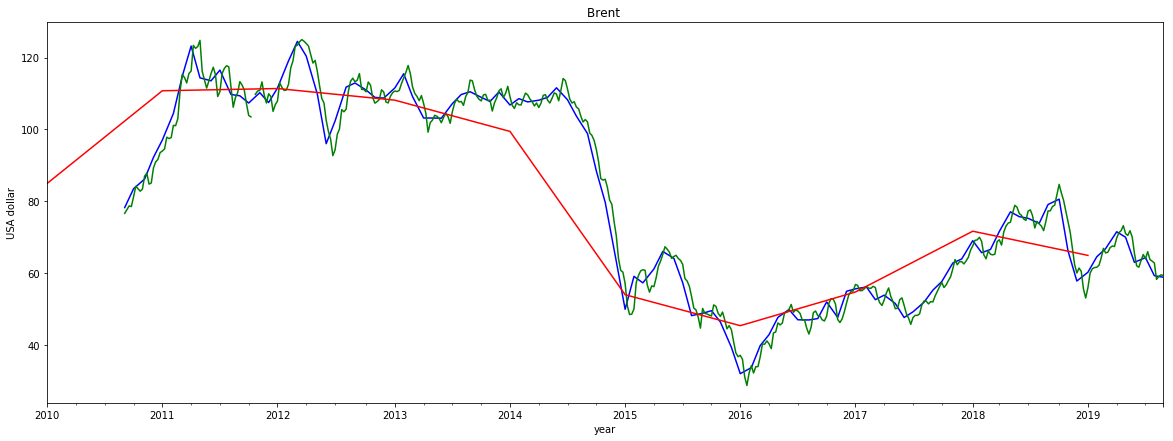

In [20]:

M_mean = brent_data_M['Значение'].plot( color='b', figsize=( 20, 7 ), title='Brent ')
W_mean = brent_data_W['Значение'].plot( color='g', figsize=( 20, 7 ), title='Brent ')
Y_mean = brent_data_Y['Значение'].plot( color='r', figsize=( 20, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('year')

Text(0.5, 0, 'year')

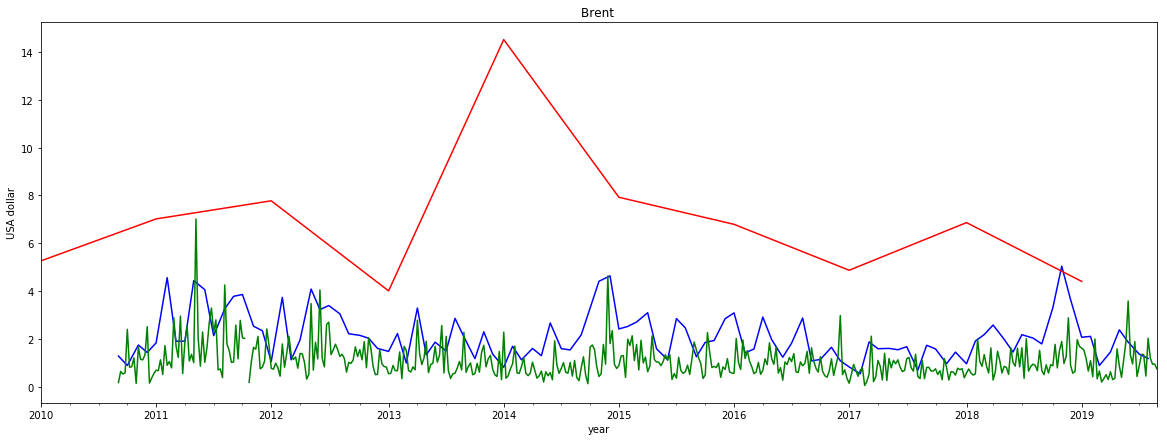

In [21]:
M_std = brent_data_M_std['Значение'].plot( color='b', figsize=( 20, 7 ), title='Brent ')
W_std = brent_data_W_std['Значение'].plot( color='g', figsize=( 20, 7 ), title='Brent ')
Y_std = brent_data_Y_std['Значение'].plot( color='r', figsize=( 20, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('year')

как видно из полученных графиков данные о цене нефти Brent построенные по усредненным месячным и недельным данным повторяют характер графика для ежедневных данных цены нефти. Поэтому месячные данные могут быть использованы для анализа без потери значительной информации.
при этом средниегодовые данные по цене на нефть уже потеряли значительную часть информации и показывают только направление изменение цены (рост/падение) 

5.Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.